<a href="https://www.kaggle.com/code/sharonlogier/student-performance?scriptVersionId=224456555" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

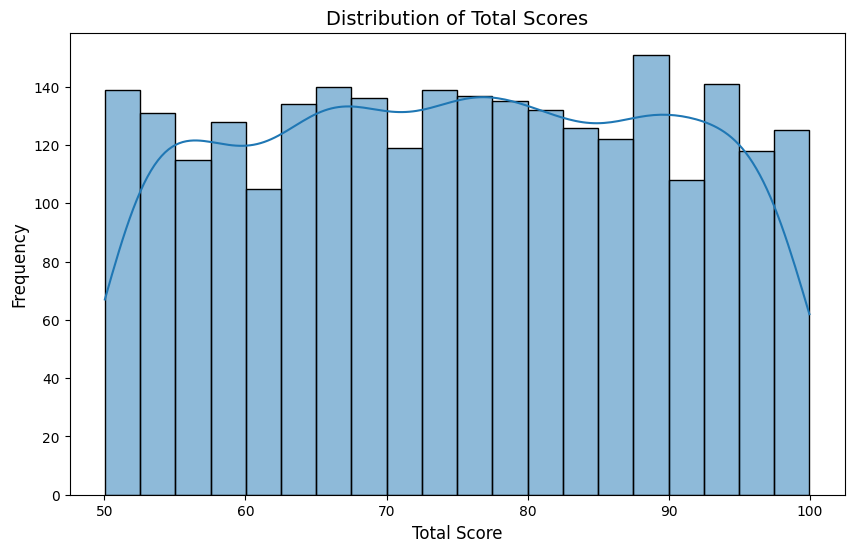

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
df = pd.read_csv("/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv")

# Fix potential infinite values
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
df.dropna(inplace=True)

# Create a distribution plot for Total Scores
plt.figure(figsize=(10, 6))
sns.histplot(df["Total_Score"], bins=20, kde=True)
plt.title("Distribution of Total Scores", fontsize=14)
plt.xlabel("Total Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

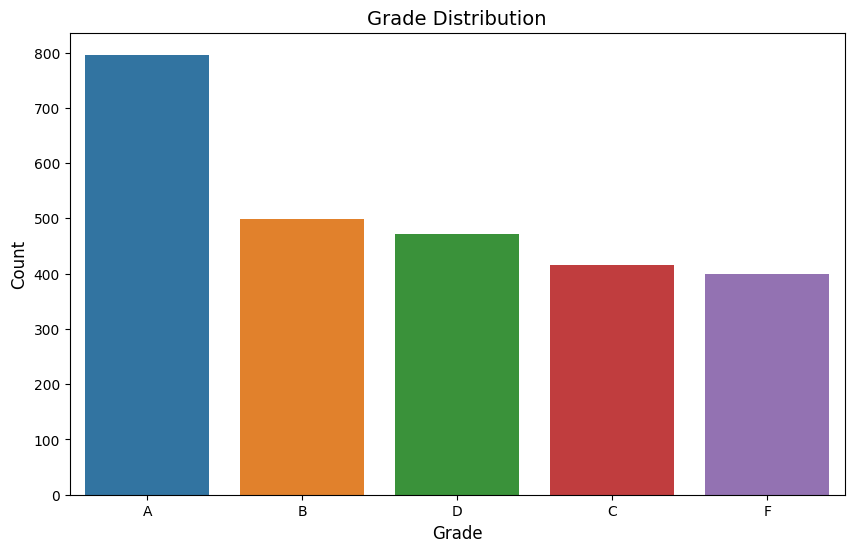

In [2]:
# Create a bar chart showing the distribution of grades
plt.figure(figsize=(10, 6))
grade_order = df["Grade"].value_counts().index  # Order by frequency
sns.barplot(x=df["Grade"].value_counts().index, y=df["Grade"].value_counts().values, order=grade_order)
plt.title("Grade Distribution", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

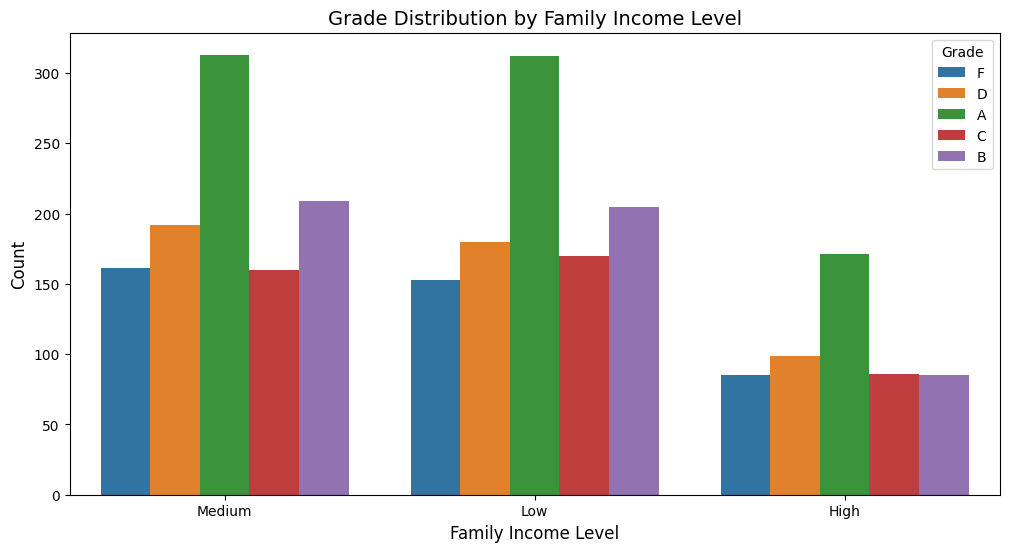

In [3]:
# Grade Distribution by Family Income Level using countplot instead of histplot
plt.figure(figsize=(12, 6))
sns.countplot(x="Family_Income_Level", hue="Grade", data=df, order=df["Family_Income_Level"].value_counts().index)
plt.title("Grade Distribution by Family Income Level", fontsize=14)
plt.xlabel("Family Income Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Grade")
plt.show()

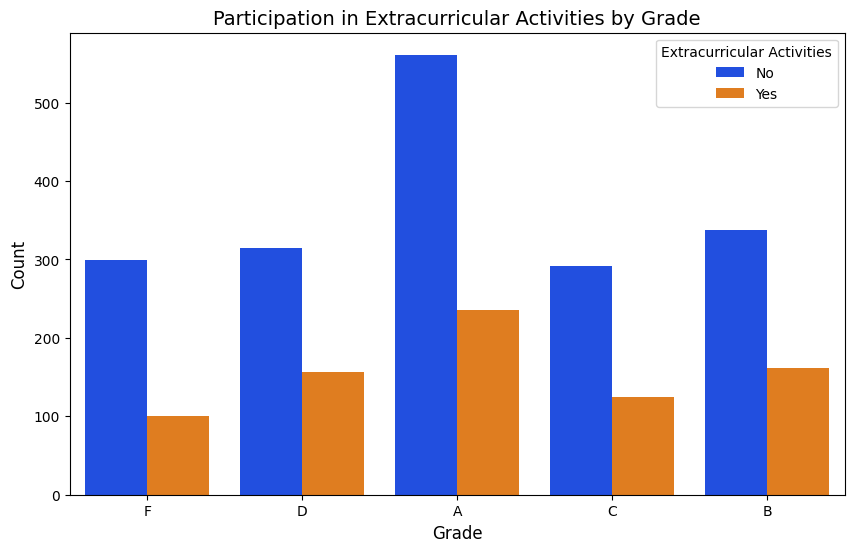

In [4]:
# Update the count plot with a distinct color palette for better differentiation
plt.figure(figsize=(10, 6))
sns.countplot(x="Grade", hue="Extracurricular_Activities", data=df, palette="bright")

# Add title and labels
plt.title("Participation in Extracurricular Activities by Grade", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Extracurricular Activities")

# Show the plot
plt.show()


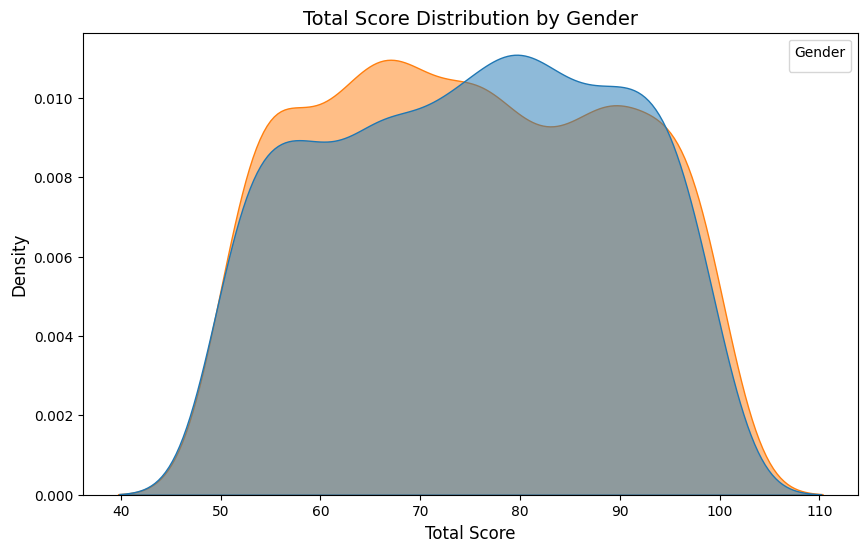

In [5]:
# 1. KDE Plot: Total Score Distribution by Gender
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Total_Score", hue="Gender", fill=True, alpha=0.5)
plt.title("Total Score Distribution by Gender", fontsize=14)
plt.xlabel("Total Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Gender")
plt.show()

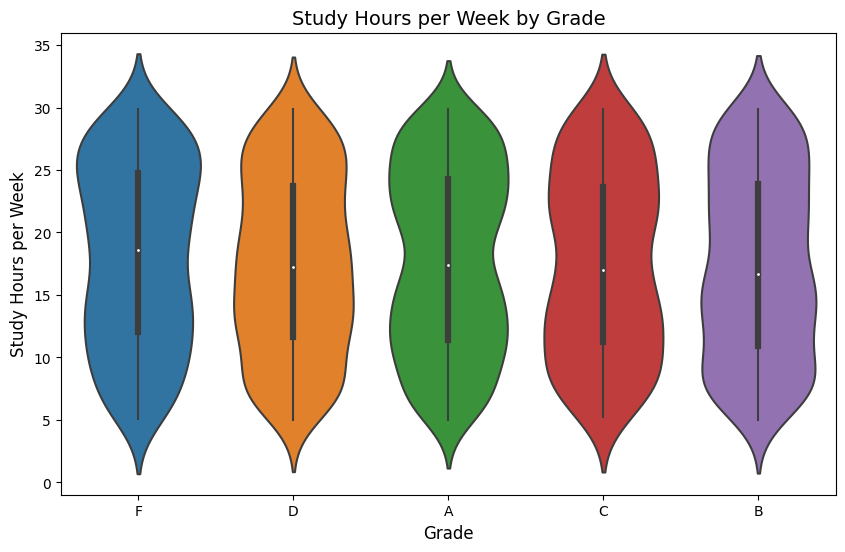

In [6]:
# 2. Violin Plot: Study Hours per Week by Grade
plt.figure(figsize=(10, 6))
sns.violinplot(x="Grade", y="Study_Hours_per_Week", data=df)
plt.title("Study Hours per Week by Grade", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Study Hours per Week", fontsize=12)
plt.show()

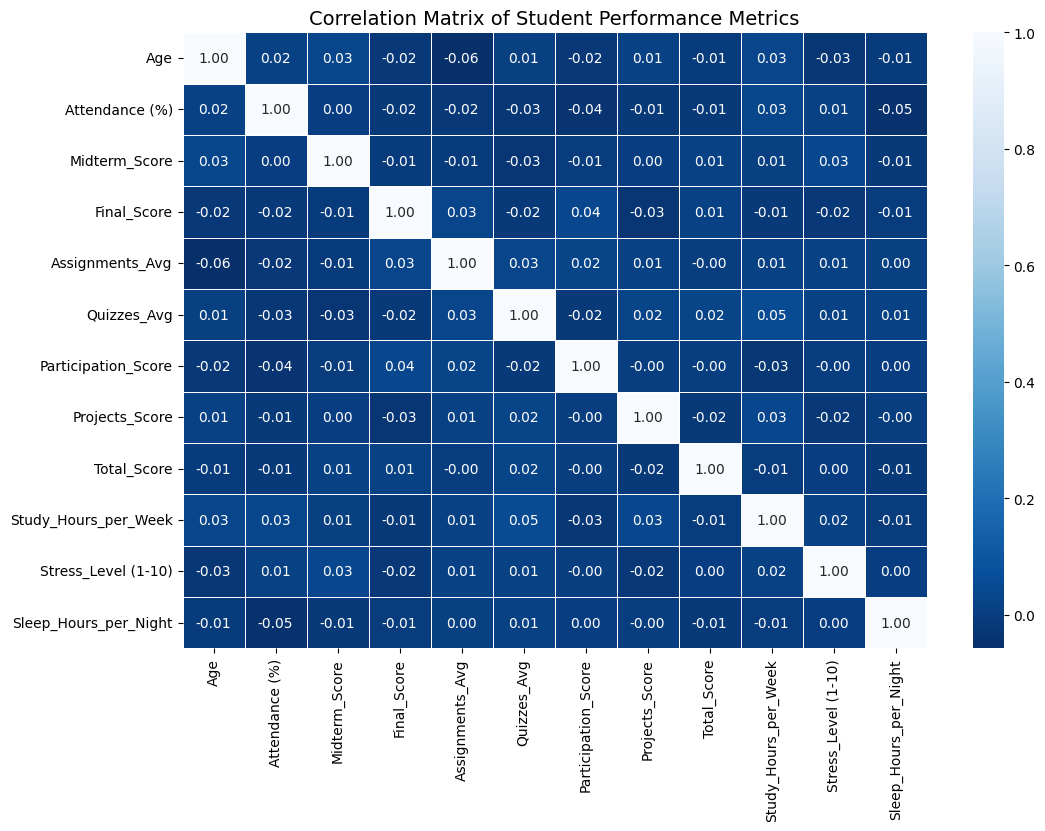

In [7]:
# 3. Heatmap: Correlation Matrix of Performance Metrics
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues_r", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Student Performance Metrics", fontsize=14)
plt.show()

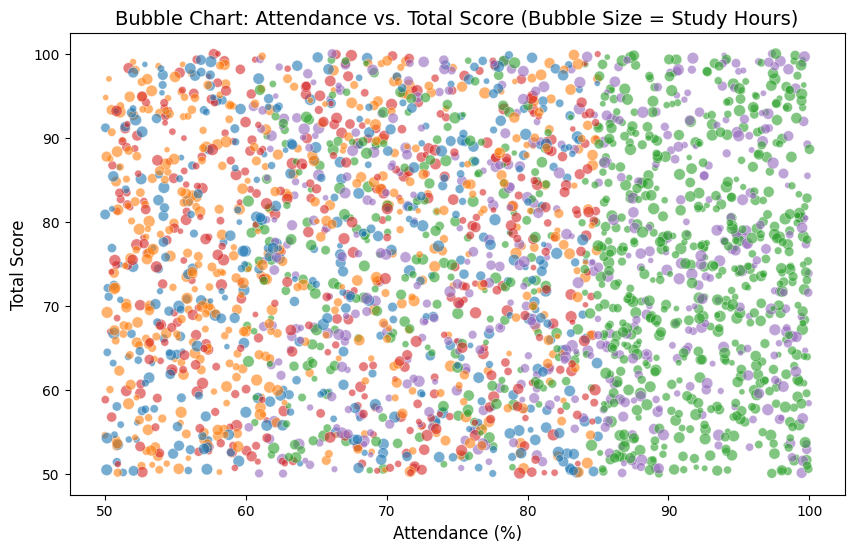

In [8]:
# 5. Bubble Chart: Attendance vs. Total Score with Bubble Size = Study Hours
plt.figure(figsize=(10, 6))
bubble_sizes = df["Study_Hours_per_Week"] * 5  # Adjust bubble size for visibility
sns.scatterplot(x="Attendance (%)", y="Total_Score", size=bubble_sizes, hue="Grade", data=df, alpha=0.6, legend=False)
plt.title("Bubble Chart: Attendance vs. Total Score (Bubble Size = Study Hours)", fontsize=14)
plt.xlabel("Attendance (%)", fontsize=12)
plt.ylabel("Total Score", fontsize=12)
plt.show()